In [ ]:
from meteo_api import MeteoAPI
from meteo_analyzer import MeteoAnalyzer
from helper_functions import (
    get_today_str,
    get_n_years_from_today_str,
    get_n_last_days,
    cut_forecast_start,
    plot_ts,
    resample_ts_to_five_min)

Task 1 - MeteoAPI class

In [2]:
place_code = "kaunas"
station_code = "kauno-ams"
url = f"https://api.meteo.lt/v1/"
meteoAPI = MeteoAPI(place_code, station_code, url)
end_date = get_today_str()
start_date = get_n_years_from_today_str(1)

Task 2 - Read year of data and visualize it

In [3]:
analyzer = MeteoAnalyzer(meteoAPI, start_date, end_date)

In [4]:
analyzer.calculate_hist_mean("airTemperature")
analyzer.calculate_hist_mean("relativeHumidity")
analyzer.calculate_hist_day_mean("airTemperature")
analyzer.calculate_hist_night_mean("airTemperature")
analyzer.calculate_rainy_weekends()

Mean airTemperature: 9.50
Mean relativeHumidity: 78.52
Mean day airTemperature - 11.15
Mean night airTemperature - 7.56
Weekends count which had rain on both days for atleast hour: 11


Task 3 - Visualize historical temperature together with forecast

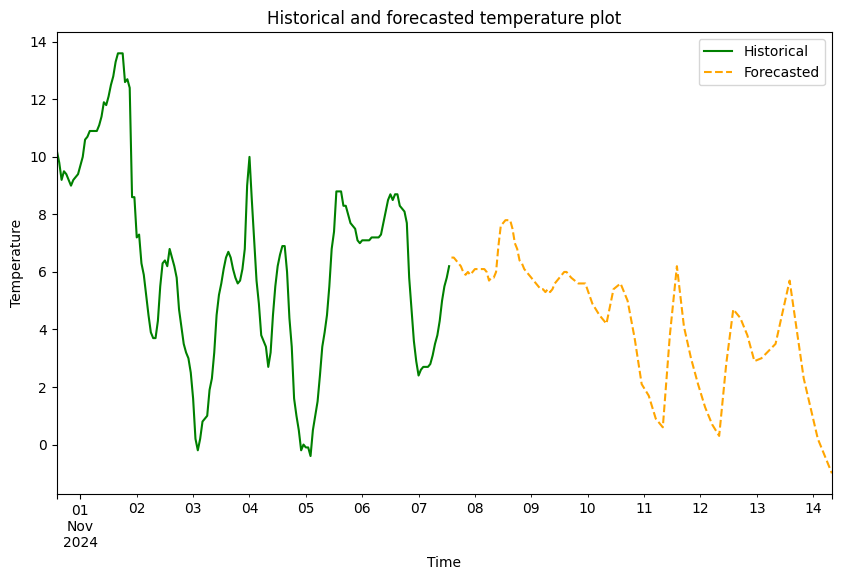

In [7]:
ts_hist = analyzer.get_hist_metric("airTemperature")
ts_forec = analyzer.get_forecast_metric("airTemperature")

ts_hist = get_n_last_days(ts_hist, 7)
ts_forec = cut_forecast_start(ts_hist, ts_forec)
plot_ts(ts_hist, ts_forec)

Task 4 - Resample and interpolate series

In [8]:
print("Before resampling:")
print(ts_hist.describe())
print("After resampling:")
ts_hist_five_min = resample_ts_to_five_min(ts_hist)
print(ts_hist_five_min.describe())

Before resampling:
count    168.000000
mean       6.240476
std        3.363475
min       -0.400000
25%        3.675000
50%        6.300000
75%        8.525000
max       13.600000
Name: airTemperature, dtype: float64
After resampling:
count    2005.000000
mean        6.229726
std         3.344825
min        -0.400000
25%         3.700000
50%         6.333333
75%         8.533333
max        13.600000
Name: airTemperature, dtype: float64
